# Section 2.6 — Inventory of continuous distributions

This notebook contains all the code examples from [Section 2.4 Inventory of continuous distributions]() of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

# # silence annoying warnings
# import warnings; warnings.filterwarnings('ignore')

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
# Download the `plot_helpers.py` module from the book's main github repo:
import os, requests
if not os.path.exists("plot_helpers.py"):
    resp = requests.get("https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/notebooks/plot_helpers.py")
    with open("plot_helpers.py", "w") as f:
        f.write(resp.text)
    print("Downloaded `plot_helpers.py` module to current directory:", os.getcwd())
else:
    print("You already have plot_helpers.py, so we can proceed.")

from plot_helpers import generate_pdf_panel
from plot_helpers import plot_pdf
from plot_helpers import plot_pdf_and_cdf

You already have plot_helpers.py, so we can proceed.


## Continuous distribution reference

### Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(0,1)$ is described by the following probability density function:
$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$
where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U=u\}.
For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

In [5]:
from scipy.stats import uniform

# create a uniform random variable U(0,1)
rvU = uniform(0, 1)
rvU

In [6]:
# draw 10 random samples from X
rvU.rvs(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

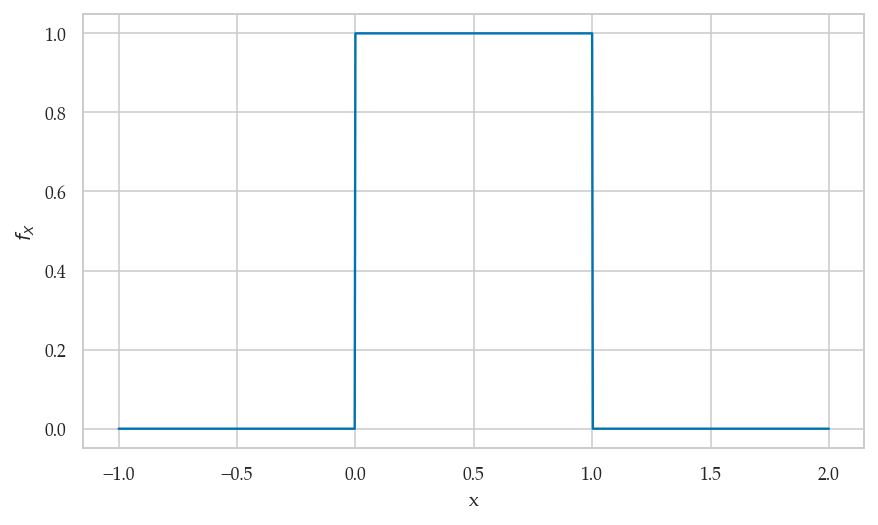

In [7]:
_ = plot_pdf(rvU, xlims=[-1,2])

In [8]:
## ALT. manual plot
## plot the probability density function (pdf) of the random variable X
# x = np.linspace(-1, 2, 10000)
# fU = rvU.pdf(x)
# _ = sns.lineplot(x=x, y=fU).set_title("Probability density function $f_X$ for the uniform distribution between 0 and 1")

In [9]:
# BONUS:
# _ = plot_pdf_and_cdf(rvU, b=0.4)

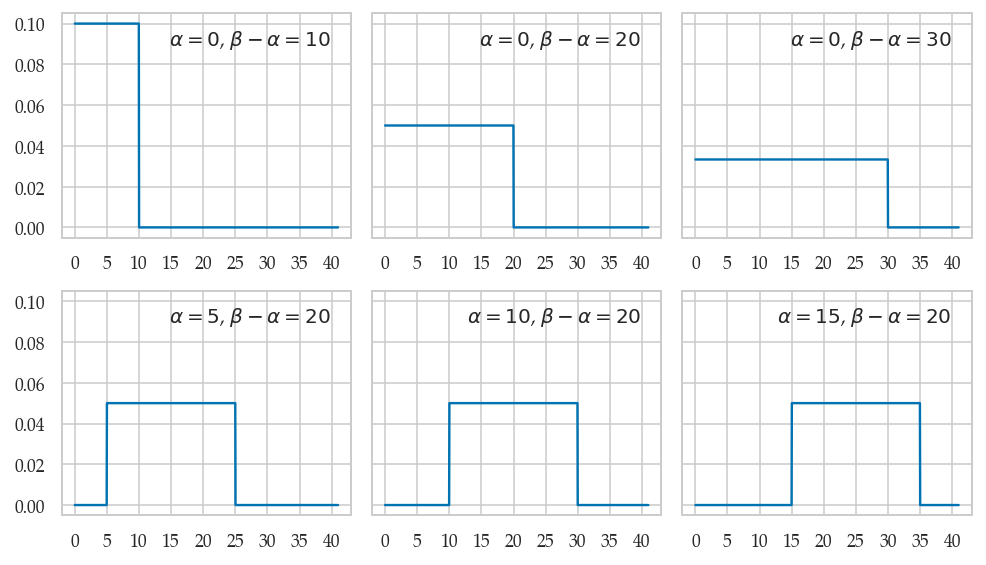

In [10]:
from scipy.stats import uniform

xmax = 41
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=0,scale=10),  dict(loc=0,scale=20),  dict(loc=0,scale=30)],
    [dict(loc=5,scale=20),  dict(loc=10,scale=20),  dict(loc=15,scale=20)],
]

params_to_latex = {
    "loc":"\\alpha",
    "scale":"\\beta - \\alpha"
}

_ = generate_pdf_panel("figures/prob/probpanels/uniform_panel.pdf",
                       xs, uniform, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Exponential

In [11]:
from scipy.stats import expon

loc = 0
lam = 7

rvE = expon(loc, lam)

In [12]:
mean, var, skew, kurt = rvE.stats(moments='mvsk')
mean, var, skew, kurt

(array(7.), array(49.), array(2.), array(6.))

In [13]:
# f_E(5) = pdf value at x=10
rvE.pdf(10)

0.034235862348825113

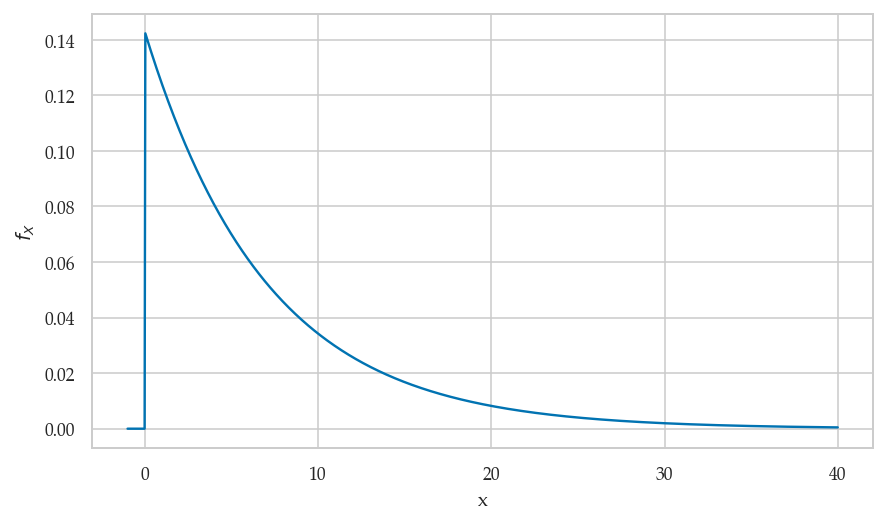

In [14]:
_ = plot_pdf(rvE, xlims=[-1,40])

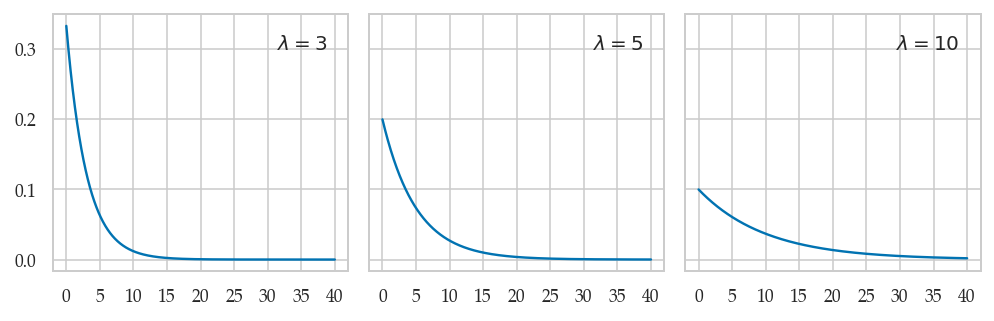

In [15]:
from scipy.stats import expon

xmax = 40
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax+5, 5)


# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=0,scale=3),    dict(loc=0,scale=5),    dict(loc=0,scale=10)  ],
]

params_to_latex = {
    'scale': '\\lambda',
}

with plt.rc_context({"figure.figsize":(7,2.3)}):
    _ = generate_pdf_panel("figures/prob/probpanels/expon_panel.pdf",
                           xs, expon, params_matrix,
                           params_to_latex=params_to_latex,
                           xticks=xticks)

### Normal

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:
$$ \large
    f_N(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(x-\mu)^2}{2\sigma^2}}.
$$
The mean $\mu$ and the standard deviation $\sigma$ are called the parameters of the distribution.
The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions.


In [16]:
from scipy.stats import norm

mu = 10    # = 𝜇   where is the centre?
sigma = 3  # = 𝜎   how spread out is it?

rvN = norm(mu,sigma)

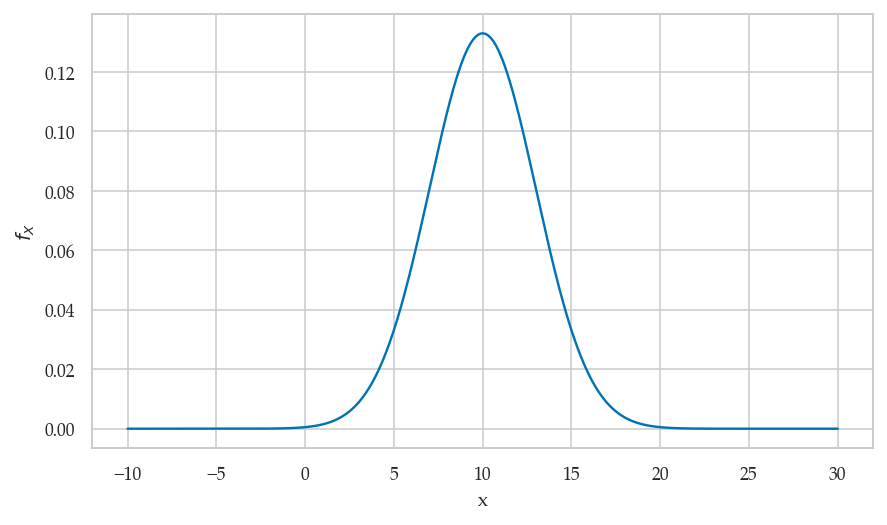

In [17]:
_ = plot_pdf(rvN, xlims=[-10,30])

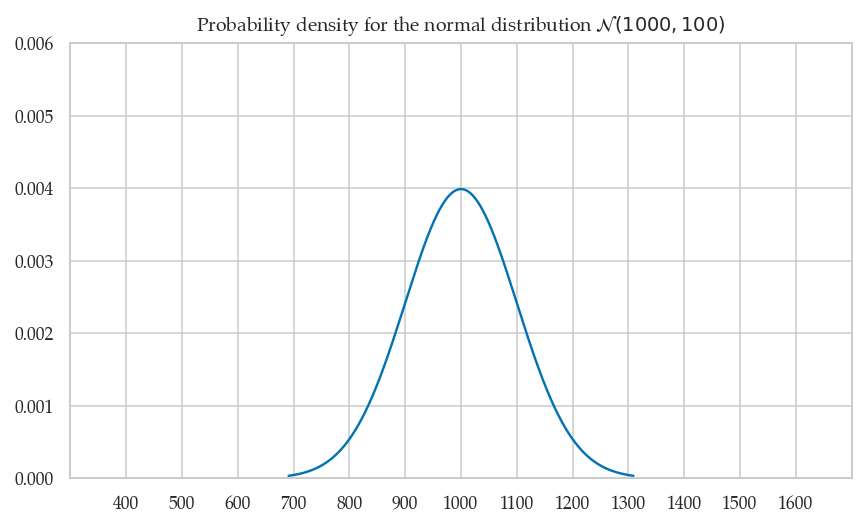

In [18]:
# ALT. generate the plot manually
from scipy.stats import norm

# 1. choose the parameters:
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?

# 2. create a normal random variable
rvN = norm(mean, std)

# 3. plot it's probability density function (pdf)
x = np.linspace(rvN.ppf(0.001), rvN.ppf(0.999), 10000)
y = rvN.pdf(x)
ax = sns.lineplot(x=x, y=y)
title = 'Probability density for the normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
ax.set_title(title)
ax.set_xlim(300,1700)
plt.xticks(np.arange(400,1700,100))
_ = ax.set_ylim(0, 0.006)

#### Panel

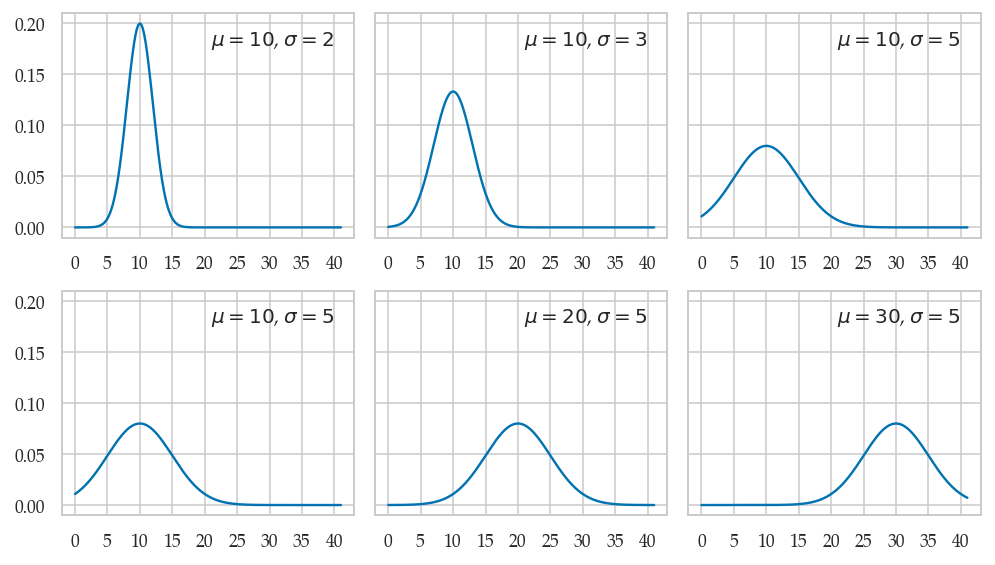

In [19]:
from scipy.stats import norm

xmax = 41
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax, 5)


# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=10, scale=2),  dict(loc=10, scale=3),  dict(loc=10, scale=5)],
    [dict(loc=10, scale=5),  dict(loc=20, scale=5),  dict(loc=30, scale=5)],
]

params_to_latex = {
    'loc': '\\mu',
    'scale': '\\sigma',
}

_ = generate_pdf_panel("figures/prob/probpanels/normal_panel.pdf",
                       xs, norm, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Standard normal

A standard normal is denoted $Z$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu=0,\sigma=1)$ and described by the probability density function:
$$ \Large
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{\small -\tfrac{z^2}{2}}.
$$


In [20]:
from scipy.stats import norm

rvZ = norm(0,1)

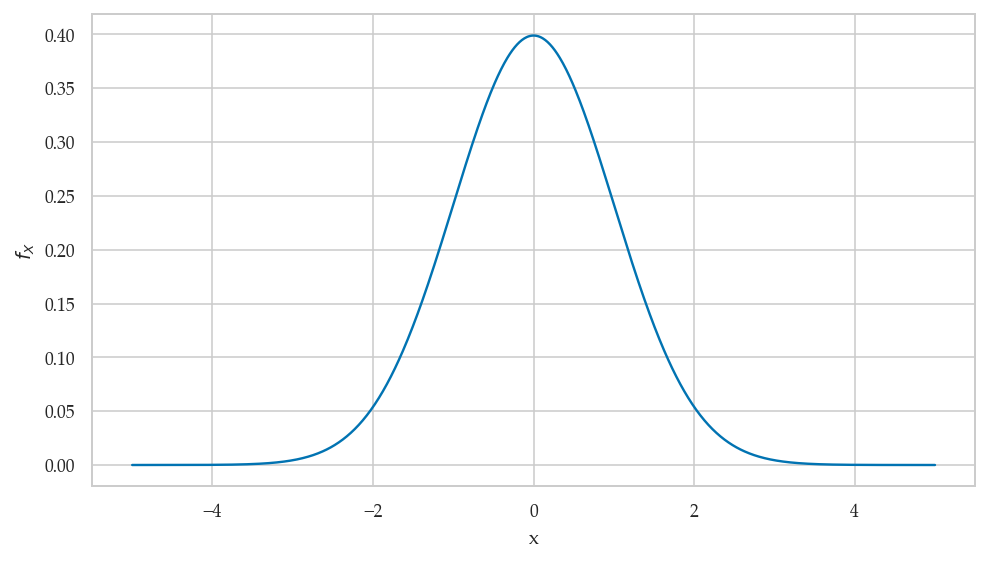

In [21]:
fig, ax = plt.subplots()

plot_pdf(rvZ, xlims=[-5,5], ax=ax)

filename = "figures/prob/probpanels/z_dist.pdf"
basename = filename.replace('.pdf','').replace('.png','')
fig.tight_layout()
fig.savefig(basename + '.pdf', dpi=300, bbox_inches="tight", pad_inches=0.02)
fig.savefig(basename + '.png', dpi=300, bbox_inches="tight", pad_inches=0.02)

### Student's $t$-distribution

$$
aa
$$

In [22]:
from scipy.stats import t

df = 10
rvT = t(df)

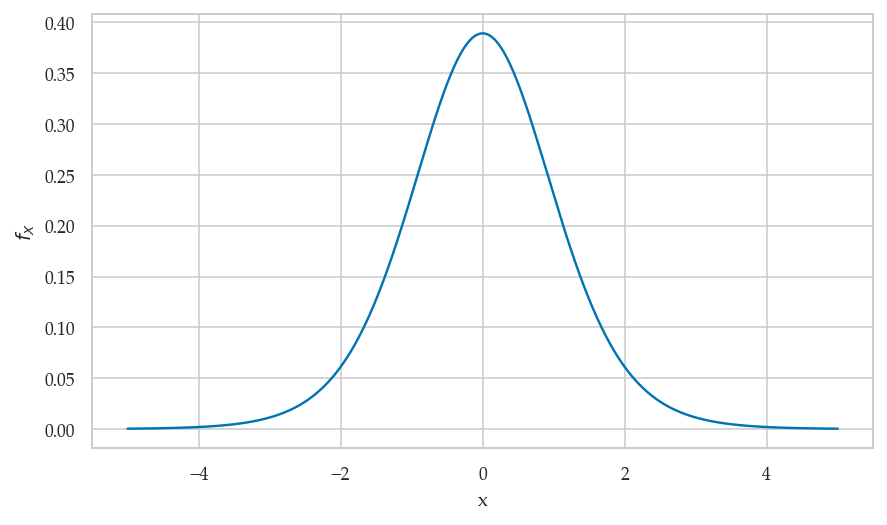

In [23]:
_ = plot_pdf(rvT, xlims=[-5,5])

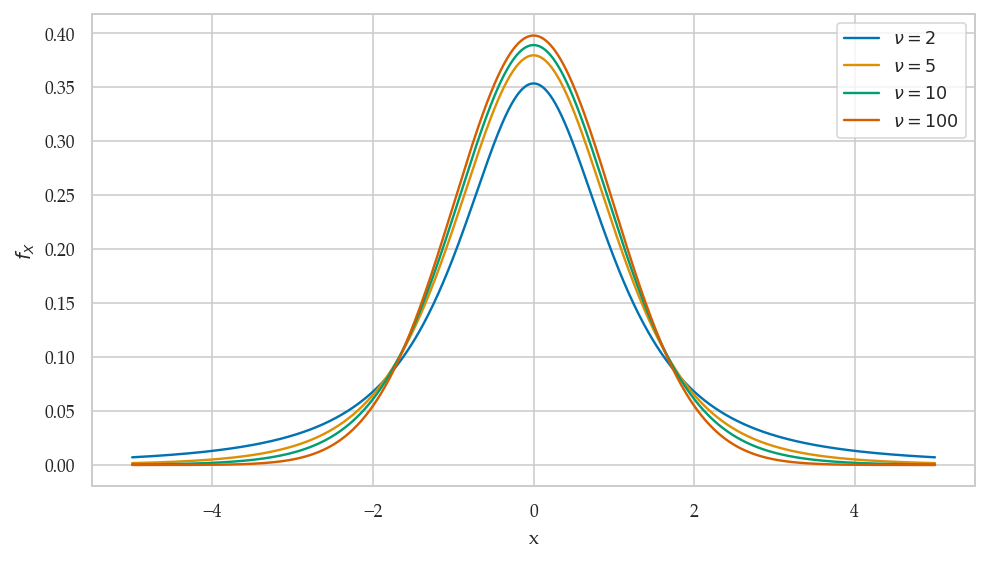

In [24]:
fig, ax = plt.subplots()

for df in [2,5,10,100]:
    rvT = t(df)
    ax = plot_pdf(rvT, xlims=[-5,5], ax=ax, label="$\\nu={}$".format(df))

filename = "figures/prob/probpanels/t_dists.pdf"
basename = filename.replace('.pdf','').replace('.png','')
fig.tight_layout()
fig.savefig(basename + '.pdf', dpi=300, bbox_inches="tight", pad_inches=0.02)
fig.savefig(basename + '.png', dpi=300, bbox_inches="tight", pad_inches=0.02)

### Snedecor's $F$-distribution

In [25]:
from scipy.stats import f

# help(f)
df1, df2 = 15, 10
rvF = f(df1, df2)

In [26]:
rvF.mean(), rvF.var()


(1.25, 0.7986111111111112)

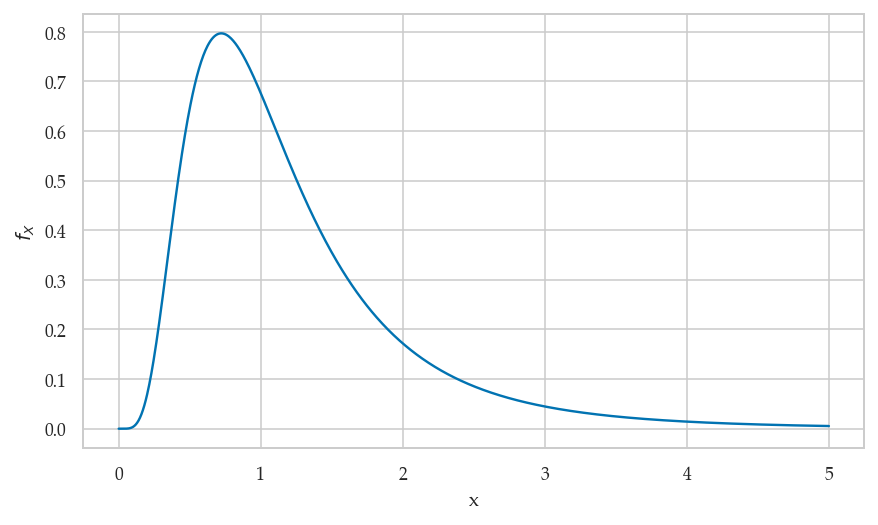

In [27]:
_ = plot_pdf(rvF, xlims=[0,5])

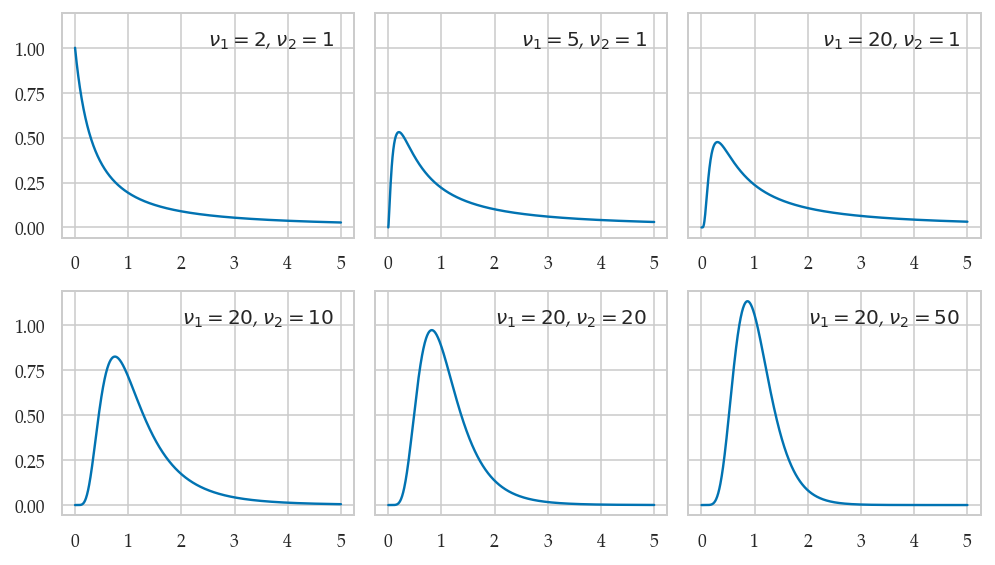

In [28]:
from scipy.stats import f

xmax = 5
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax+1, 1)


# parameter dicts (list of lists)
params_matrix = [
    [dict(dfn=2, dfd=1),    dict(dfn=5, dfd=1),    dict(dfn=20, dfd=1)],
    [dict(dfn=20, dfd=10),  dict(dfn=20, dfd=20),  dict(dfn=20, dfd=50)],
]

params_to_latex = {
    'dfn': '\\nu_1',
    'dfd': '\\nu_2',
}

_ = generate_pdf_panel("figures/prob/probpanels/f_panel.pdf",
                       xs, f, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Chi-squared distribution

In [29]:
from scipy.stats import chi2

k = 10
rvX2 = chi2(k)

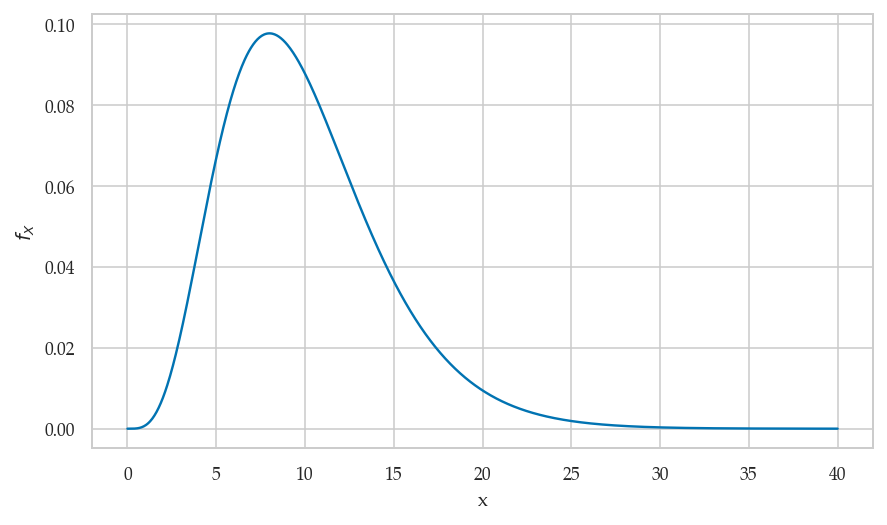

In [30]:
_ = plot_pdf(rvX2, xlims=[0,40])

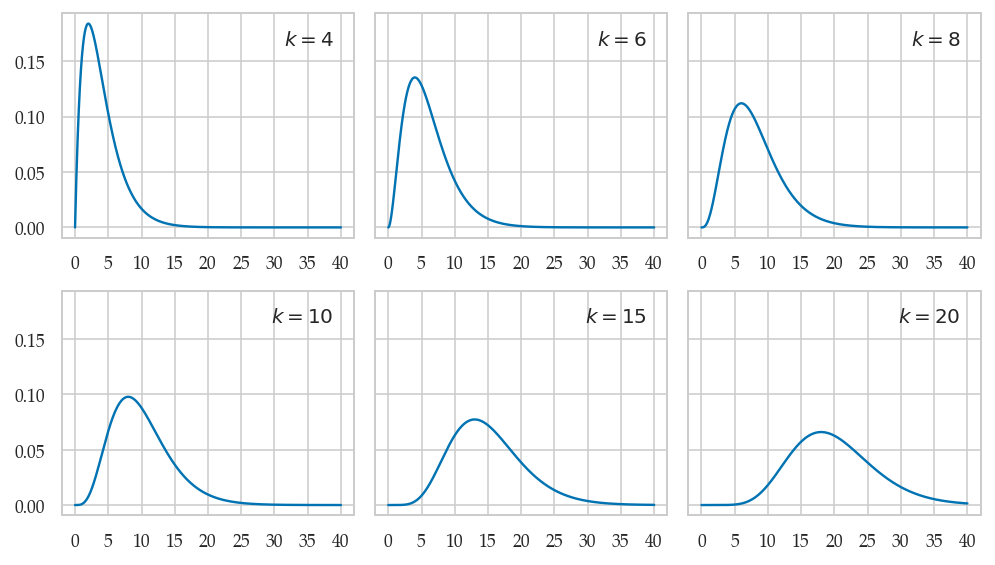

In [31]:
from scipy.stats import chi2

xmax = 40
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax+5, 5)


# parameter dicts (list of lists)
params_matrix = [
    [dict(df=4),    dict(df=6),    dict(df=8)],
    [dict(df=10),   dict(df=15),   dict(df=20)]
]

params_to_latex = {
    "df":"k",
}

_ = generate_pdf_panel("figures/prob/probpanels/chi2_panel.pdf",
                       xs, chi2, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Gamma (optional)

https://en.wikipedia.org/wiki/Gamma_distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

In [32]:
from scipy.stats import gamma

alpha = 4
loc = 0
lam = 2
beta = 1/lam

rvG = gamma(alpha, loc=loc, scale=beta)

In [33]:
rvG.mean(), rvG.var()

(2.0, 1.0)

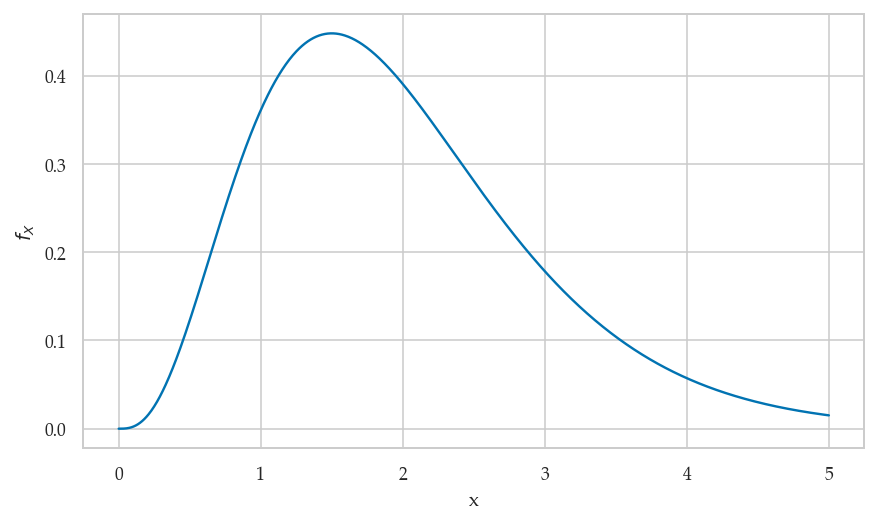

In [34]:
_ = plot_pdf(rvG, xlims=[0,5])

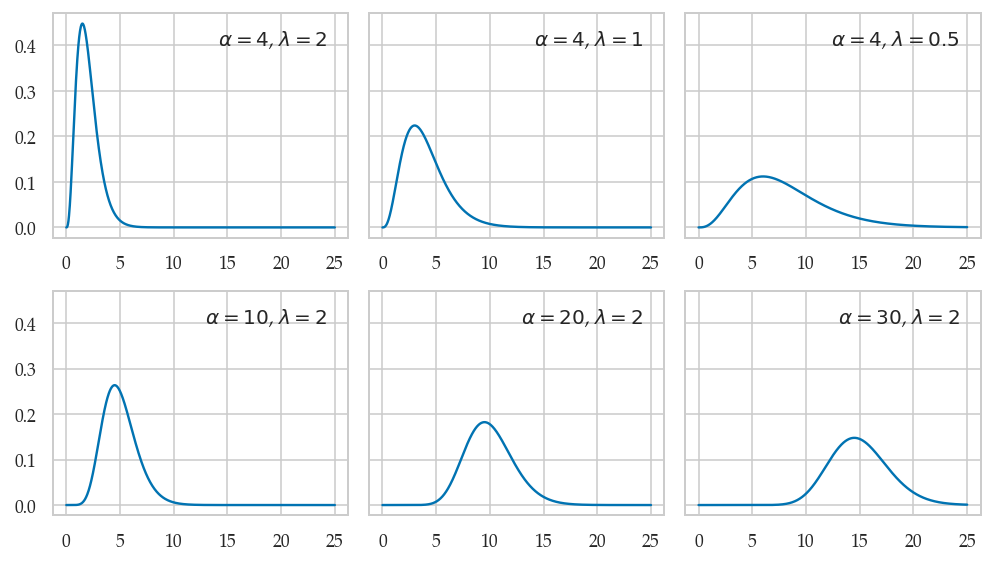

In [35]:
from scipy.stats import gamma

xmax = 25
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax+5, 5)


# parameter dicts (list of lists)
params_matrix = [
    [dict(a=4,loc=0,scale=1/2),   dict(a=4,loc=0,scale=1),     dict(a=4,loc=0,scale=2)],
    [dict(a=10,loc=0,scale=1/2),  dict(a=20,loc=0,scale=1/2),  dict(a=30,loc=0,scale=1/2)],
]

params_to_latex = {
    "a": "\\alpha",
    "lam": "\\lambda",
}

_ = generate_pdf_panel("figures/prob/probpanels/gamma_panel.pdf",
                       xs, gamma, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Beta (optional)

In [36]:
from scipy.stats import beta as betad

alpha = 3
beta = 7

rvB = betad(alpha, beta)

In [37]:
rvB.mean(), rvB.var()

(0.3, 0.019090909090909092)

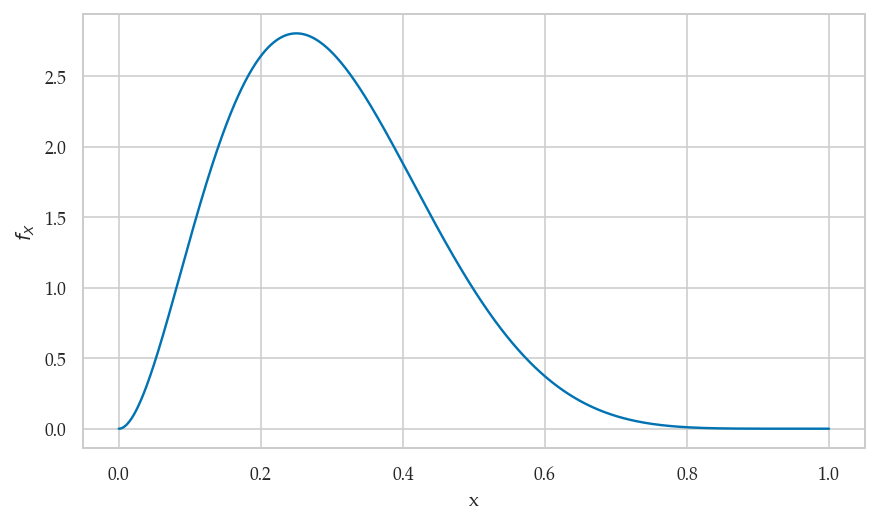

In [38]:
_ = plot_pdf(rvB, xlims=[0,1])

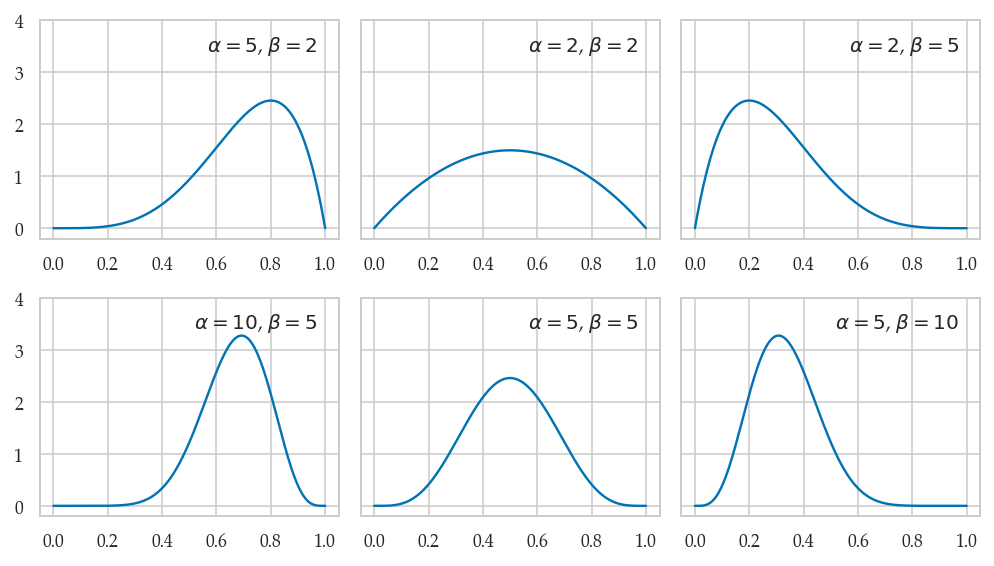

In [39]:
from scipy.stats import beta

xmax = 1
xs = np.linspace(0, xmax, 1000)
xticks = np.linspace(0, xmax, 6)


# parameter dicts (list of lists)
params_matrix = [
    [dict(a=5,b=2),    dict(a=2,b=2),   dict(a=2,b=5)],
    [dict(a=10,b=5),   dict(a=5,b=5),   dict(a=5,b=10)],
]

params_to_latex = {
    "a": "\\alpha",
    "b": "\\beta",
}

_ = generate_pdf_panel("figures/prob/probpanels/beta_panel.pdf",
                       xs, beta, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks,
                       ylims=[-0.2,4])

### Cauchy (optional)

In [40]:
from scipy.stats import cauchy

x0 = 3
gamma = 5

rvC = cauchy(x0, gamma)

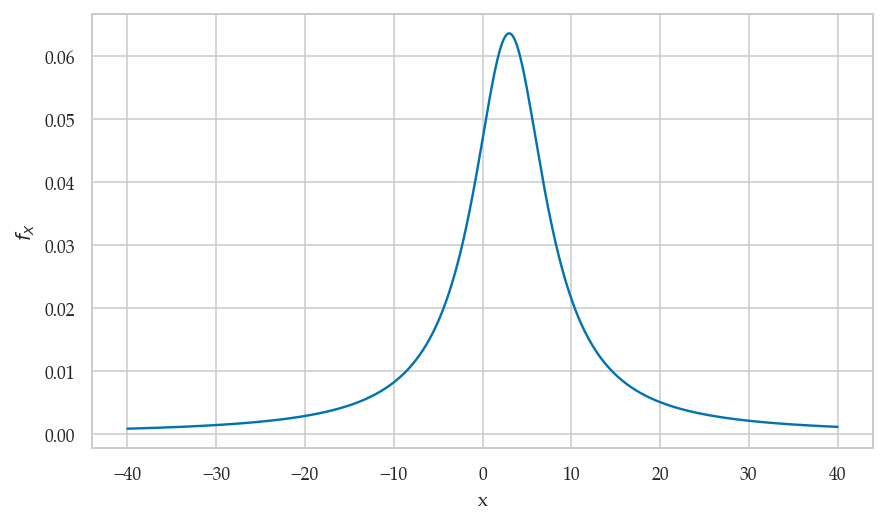

In [41]:
_ = plot_pdf(rvC, xlims=[-40,40])